In [1]:
import os
import pandas as pd

LAST_5_SUBJECTS = [
	'global_facts_test.csv',
	'college_mathematics_test.csv',
	'abstract_algebra_test.csv',
	# 'moral_scenarios_test.csv',
	'high_school_physics_test.csv'
]

def check_answers(filename, results_path):
	df = pd.read_csv(f"data/test/{filename}.csv", names=['question', 'A', 'B', 'C', 'D', 'answer'])
	df = df.dropna(subset=["question"])
	total_lines = len(df)
	with open(f"{results_path}/{filename}_answers.txt", "r") as file:
		lines = file.readlines()
		total_answers = len(lines)
	# print(f"{filename}: {total_lines} questions, {total_answers} answers")
	return total_lines == total_answers

discrepencancies = []
for filename in os.listdir("data/test"):
	if filename.endswith(".csv"):
		# try:
		if filename in LAST_5_SUBJECTS:
			print(f"Warning: {filename} is one of the last 5 subjects")
			_check_answers = check_answers(filename[:-4], results_path="results/02")
		else:
			_check_answers = check_answers(filename[:-4], results_path="results/01")
		if not _check_answers:
			discrepencancies.append(filename)
		# except Exception as e:
		# 	print(f"Error: {filename} could not be checked")
		# 	print(e)
		# 	continue

if len(discrepencancies) == 0:
	print("All tests have the correct number of answers")
else:
	print("The following tests have a different number of answers than questions:")
	for filename in discrepencancies:
		print(f"  {filename}")

All tests have the correct number of answers


In [8]:
def compare_answers(filename, results_path="results/01"):
	df = pd.read_csv(f"data/test/{filename}.csv", names=['question', 'A', 'B', 'C', 'D', 'answer'])
	df = df.dropna(subset=["question"])
	answers = df['answer'].tolist()
	answers = [str(answer).strip() for answer in answers]
	with open(f"{results_path}/{filename}_answers.txt", "r") as file:
		lines = file.readlines()
		lines = [str(line.split(".")[1]).strip() for line in lines]
	return [answers[i] == lines[i] for i in range(len(answers))]

comparision = {}

for filename in os.listdir("data/test"):
	if filename.endswith(".csv"):
		try:
			if filename in LAST_5_SUBJECTS:
				print(f"Warning: {filename} is one of the last 5 subjects")
				_compare_answers = compare_answers(filename[:-4], results_path="results/02")
			else:
				_compare_answers = compare_answers(filename[:-4])
			comparision[filename] = _compare_answers
		except Exception as e:
			print(f"Error: {filename} could not be compared")
			print(e)
			continue

old_scores = {}

# get the old scores for the LAST_5_SUBJECTS from results/01
for filename in LAST_5_SUBJECTS:
	_compare_answers = compare_answers(filename[:-4])
	old_scores[filename] = _compare_answers

In [11]:
acuracies = {}
old_acuracies = {}

# calculate accuracy
for test in comparision:
	correct = sum(comparision[test])
	total = len(comparision[test])
	accuracy = correct / total
	acuracies[test] = accuracy

# old accuracy
for test in old_scores:
	correct = sum(old_scores[test])
	total = len(old_scores[test])
	accuracy = correct / total
	old_acuracies[test] = accuracy

# overall accuracy
total_correct = 0
total_questions = 0
for test in comparision:
	total_correct += sum(comparision[test])
	total_questions += len(comparision[test])

overall_accuracy = total_correct / total_questions
print(f"Overall accuracy: {overall_accuracy}")

Overall accuracy: 0.640364620424441


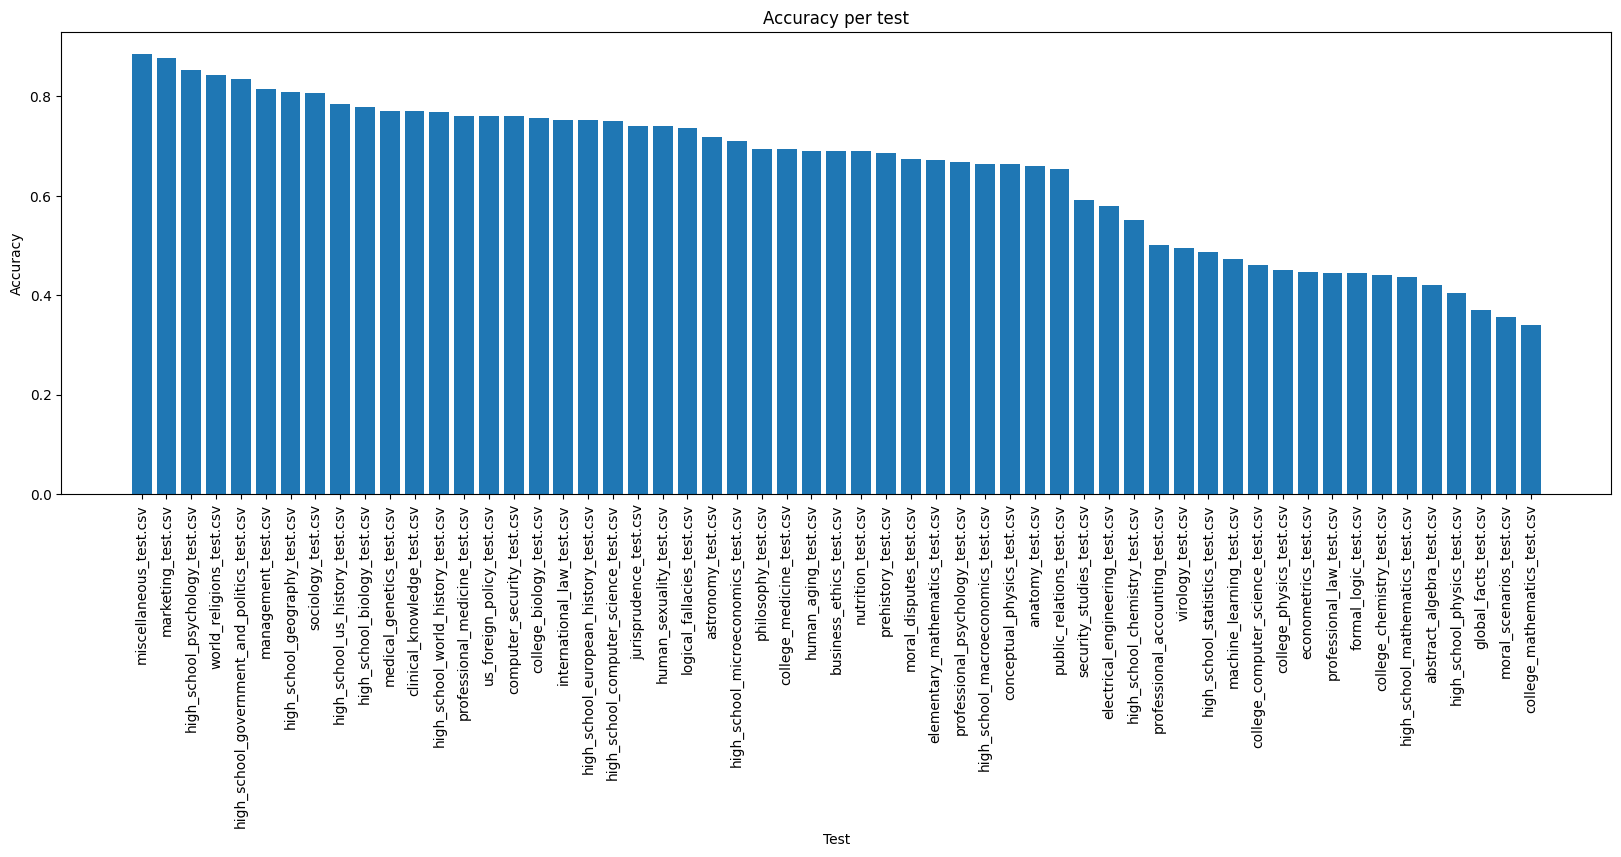

In [12]:
sorted_acuracies = sorted(acuracies.items(), key=lambda x: x[1], reverse=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.bar([test for test, accuracy in sorted_acuracies], [accuracy for test, accuracy in sorted_acuracies])
plt.ylabel('Accuracy')
plt.xlabel('Test')
plt.title('Accuracy per test')
plt.xticks(rotation=90)
plt.show()

In [13]:
sorted_acuracies[-5:]

[('abstract_algebra_test.csv', 0.42),
 ('high_school_physics_test.csv', 0.40397350993377484),
 ('global_facts_test.csv', 0.37),
 ('moral_scenarios_test.csv', 0.3553072625698324),
 ('college_mathematics_test.csv', 0.34)]

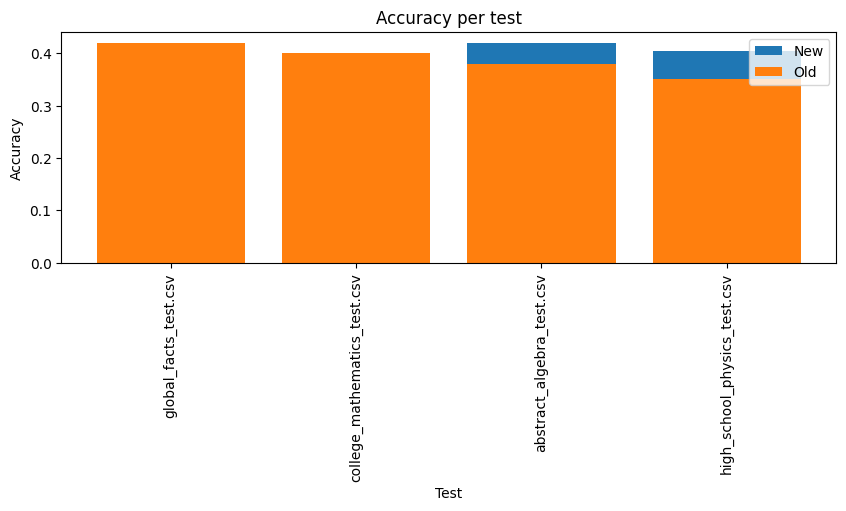

In [18]:
# plot the old and the new accuracy for LAST_5_SUBJECTS in a histogram
plt.figure(figsize=(10, 3))
plt.bar([test for test in LAST_5_SUBJECTS], [acuracies[test] for test in LAST_5_SUBJECTS], label="New")
plt.bar([test for test in LAST_5_SUBJECTS], [old_acuracies[test] for test in LAST_5_SUBJECTS], label="Old")
plt.ylabel('Accuracy')
plt.xlabel('Test')
plt.title('Accuracy per test')
plt.xticks(rotation=90)
plt.legend()
plt.show()